# Basic of Tensorflow

텐서플로우 기초 <br>
텐서플로우는 뉴럴네트워크에 최적화 되어있는 프레임워크이기 때문에 일반적 프로그래밍과 약간 다른부분이 있다. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Constant(상수형)
상수를 저장하는 자료형이다. <br>
tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False) <br>

### - Args
value: 상수값, list, tuple 둘 다 사용가능 <br>
dtype: 데이터 타입(정밀도)를 이야기하는데 float32, int32와 같은 형태를 이야기한다. <br>
shape: 결과로 나올 상수의 차원을 이야기한다. <br>
name: 이 상수의 이름을 이야기한다. 지정하지 않아도 자동으로 이름이 정해지지만 나중에 재사용의 목적으로 이름을 지정한다. <br>
verify_shape: boolean값이 들어가며 실제 데이터와 shape에서 지정한 차원이 맞는지 검증할지 정한다.

### - For example

In [3]:
tensor_1 = tf.constant(value=[1], dtype=tf.int32, shape=[1])
tensor_2 = tf.constant(value=7, dtype=tf.int32, shape=[3, 2])

In [7]:
tf.Session().run(tensor_1)

array([1])

In [8]:
tf.Session().run(tensor_2)

array([[7, 7],
       [7, 7],
       [7, 7]])

## Placeholder(플레이스홀더)
텐서플로우는 placeholder라고 하는 오퍼레이션을 제공하는데 이는 세션을 실행할때 데이터를 feeding하는 역할을 한다. 

### - Args
dtype: 입력될 텐서의 데이터 형을 지정 <br>
shape: 입력될 텐서의 차원을 지정, 지정하지 않는다면 어떤 모양의 텐서도 feed 가능 <br>
name: 이 오퍼레이션의 이름, 지정하지 않아도 상관없음

### - For example

In [8]:
data = [1, 2, 3, 4, 5]
weight = [2, 8, 1, 0, 5]

x = tf.placeholder(dtype=tf.int32)
w = tf.placeholder(dtype=tf.int32)

graph = tf.multiply(x, w)

tf.Session().run(graph, feed_dict={x:data, w:weight})

array([ 2, 16,  3,  0, 25])

## Variable(변수형)
매개변수(parameter)를 설정하고 업데이트 할때 위에서 언급한 상수형으로는 구현이 불가능하다. <br>
그렇기 때문에 Variable을 사용한다. 
Variable은 반드시 명시적으로 초기화 시켜야하며 학습 후 디스크에 저장하여 언제든 불러올 수 있다. <br>
모델의 최적 파라미터 설정값을 탐색하므로 반복할 때마다 변수를 수정하기 위한 경사법(gradient method)을 사용 할 수 있다. 

In [ ]:
tf.Variable()

### - Args

initial_value: 변수의 초기값, 텐서이거나 텐서로 변환가능한 파이썬 오브젝트면 가능 <br>
trainable: 이 변수가 학습이 가능한지 알려주는 논리값, 디폴트는 True이며 optimizer로 학습이 가능<br>
collections=None<br>
validate_shape=True<br>
caching_device=None<br>
name=None<br>
variable_def=None<br>
dtype=데이터형, 특정 데이터형을 설정하면 initial_value를 변환시킨다. <br>
expected_shape=None<br>
import_scope=None

initial_value: A `Tensor`, or Python object convertible to a `Tensor`,
    which is the initial value for the Variable. The initial value must have
    a shape specified unless `validate_shape` is set to False. Can also be a
    callable with no argument that returns the initial value when called. In
    that case, `dtype` must be specified. (Note that initializer functions
    from init_ops.py must first be bound to a shape before being used here.)
  trainable: If `True`, the default, also adds the variable to the graph
    collection `GraphKeys.TRAINABLE_VARIABLES`. This collection is used as
    the default list of variables to use by the `Optimizer` classes.
  collections: List of graph collections keys. The new variable is added to
    these collections. Defaults to `[GraphKeys.GLOBAL_VARIABLES]`.
  validate_shape: If `False`, allows the variable to be initialized with a
    value of unknown shape. If `True`, the default, the shape of
    `initial_value` must be known.
  caching_device: Optional device string describing where the Variable
    should be cached for reading.  Defaults to the Variable's device.
    If not `None`, caches on another device.  Typical use is to cache
    on the device where the Ops using the Variable reside, to deduplicate
    copying through `Switch` and other conditional statements.
  name: Optional name for the variable. Defaults to `'Variable'` and gets
    uniquified automatically.
  variable_def: `VariableDef` protocol buffer. If not `None`, recreates
    the Variable object with its contents, referencing the variable's nodes
    in the graph, which must already exist. The graph is not changed.
    `variable_def` and the other arguments are mutually exclusive.
  dtype: If set, initial_value will be converted to the given type.
    If `None`, either the datatype will be kept (if `initial_value` is
    a Tensor), or `convert_to_tensor` will decide.
  expected_shape: A TensorShape. If set, initial_value is expected
    to have this shape.
  import_scope: Optional `string`. Name scope to add to the
    `Variable.` Only used when initializing from protocol buffer.

### - For example

In [2]:
x = tf.placeholder(dtype=tf.int32, shape=[None, 2])
W = tf.Variable(initial_value=[[1, 0], [0, 2]], dtype=tf.int32)

In [3]:
y = tf.matmul(x, W)

In [4]:
data = [[1, 2], [1, 1], [1, 9]]

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 반드시 변수 초기화 실시
    result = sess.run(y, feed_dict={x:data})
    weight = sess.run(W)

In [9]:
print("result\n", result)

result
 [[ 1  4]
 [ 1  2]
 [ 1 18]]


In [11]:
print("weight\n", weight)

weight
 [[1 0]
 [0 2]]


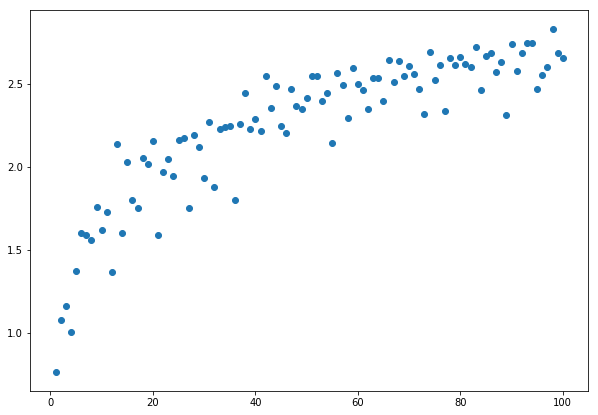

In [226]:
y = np.log10(np.arange(1, 101)*np.random.normal(loc = 5, scale=1.5, size=100))
x = np.arange(1, 101)
w = tf.Variable(initial_value=[0], dtype=tf.float32)
a = tf.Variable(initial_value=[1], dtype=tf.float32)
b = tf.Variable(initial_value=[0], dtype=tf.float32)

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

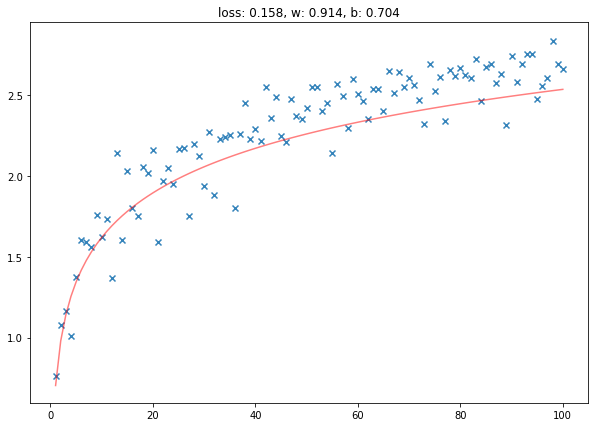

In [230]:
hypothesis = w * np.log10(x) + b

loss = tf.reduce_mean(tf.sqrt(tf.square(y-hypothesis)))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        sess.run(train)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(x=x, y=y, cmap="blue", marker="x", alpha=0.9)
    plt.plot(x, sess.run(hypothesis), 'r', alpha=0.5)
    plt.title("loss: {:.3f}, w: {:.3f}, b: {:.3f}".format(sess.run(loss), np.float(sess.run(w)), np.float(sess.run(b))))
    plt.show()

---

### 참고자료
Fundamentals of Deep Learning - Nikhil Buduma <br>
Simple reinforcement learning with Tensorflow - Arthur Juliani <br>
First Contact with TensorFlow - 텐서 플로우 블로그 (Tensor ≈ Blog), 박해선(https://tensorflow.blog/2016/04/28/first-contact-with-tensorflow/) <br>
텐서플로우-#1 자료형의 이해 - 조대협의 블로그, 조대협(http://bcho.tistory.com/1150)

End of Notebook